Best fitness: 5.043043157869223
Best solution: [0.10329082 0.09869672 0.08283086 0.09830482 0.09302499 0.11765354
 0.09516357 0.12110279 0.09476475 0.09516715]


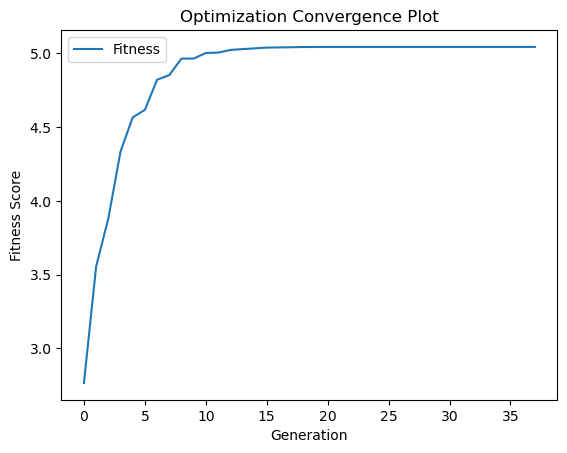

In [1]:
import vectopt as vo
import numpy as np
from numba import njit, prange
from matplotlib import pyplot as plt

@njit
def get_fitness(assets, population):
    """
    Calculates the fitness score for a given population of weights.
    In this case:
        Calculates the Sharpe ratio of a population of portfolio weights.
        Uses the Gini coefficient to penalize portfolios with extreme weights.

    The Gini implementation is optimized for Numba, and is native to the library.

    Returns
    -------
    float
        The fitness score of the population.
    """
    a = portfolio_sharpe(assets, population)
    b = 1 - vo.gini(population)
    return a * b 

@njit
def portfolio_sharpe(assets, population):
    """
    Calculates the Sharpe ratio of a population of portfolio weights.
    """
    t_population = np.ascontiguousarray(population.T)
    dot = vo.get_dot(assets, t_population)
    ratios = []
    for i in prange(dot.shape[1]):
        ratios.append(dot[:, i].mean() / dot[:, i].std())
    return np.array(ratios)

#make 10 random assets but only with positive values, and 100 observations
assets = np.random.rand(100, 10)
sol_size = assets.shape[1]
pop_size = 100
rounds = 100
min_gens = 20
early_stopping = 10
min_thresh = 0.01

# Run the DE optimization algorithm
hof_fit, hof_pop = vo.DFO_optim(assets, sol_size, pop_size, rounds, min_gens, get_fitness, early_stopping, min_thresh)

print(f"Best fitness: {hof_fit[-1]}")
print(f"Best solution: {hof_pop[-1]}")
plt.plot(hof_fit, label='Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.title('Optimization Convergence Plot')
plt.legend()
plt.show()